In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
import os

In [11]:
# Function to read and resize images
def read_and_resize_image(image_path, target_size=(100, 100)):
    image = cv2.imread(image_path)  # Read image in BGR format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize image to target size
    return image

# Read the dataset
dataset_images = []
dataset_paths = []

In [12]:
# Dataset path
dataset_path = r"D:\INFORMATION RETRIEVAL\Classes\Images"


In [13]:
# Assuming the dataset is structured such that each class has its own subdirectory
# Modify the code according to your dataset structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = read_and_resize_image(image_path)  # Read and resize image
        dataset_images.append(image)
        dataset_paths.append(image_path)

# Convert lists to numpy arrays
dataset_images = np.array(dataset_images)
dataset_paths = np.array(dataset_paths)

In [24]:
# Read the query image
query_image_path = r"D:\INFORMATION RETRIEVAL\Classes\querry\703.jpg"
query_image = read_and_resize_image(query_image_path)

In [33]:
# Check dimensions of the original query image
print("Original Query Image Dimensions:", query_image.shape)

Original Query Image Dimensions: (100, 100, 3)


In [25]:
# Apply PCA to dataset images
n_components = 50  # Number of components to keep
pca = PCA(n_components=n_components)
dataset_images_flattened = np.array([image.flatten() for image in dataset_images])
dataset_images_pca = pca.fit_transform(dataset_images_flattened)

In [34]:
# Check dimensions of the dataset images after PCA transformation
print("Dimensions of Dataset Images after PCA Transformation:", dataset_images_pca.shape)

Dimensions of Dataset Images after PCA Transformation: (710, 50)


In [26]:
# Convert RGB image to grayscale
# query_image_gray = cv2.cvtColor(query_image, cv2.COLOR_RGB2GRAY)
# Resize query image to the same dimensions as dataset images
query_image_resized = cv2.resize(query_image, dataset_images[0].shape[:2])

In [35]:
# Check dimensions of the resized query image
print("Dimensions of Resized Query Image:", query_image_resized.shape)

Dimensions of Resized Query Image: (100, 100, 3)


In [27]:
# Flatten the resized query image to a 1D array
query_image_flattened = query_image_resized.flatten()

In [28]:
# Apply PCA to query image
query_image_pca = pca.transform([query_image_flattened])

In [36]:
# Check dimensions of the query image after PCA transformation
print("Dimensions of Query Image after PCA Transformation:", query_image_pca.shape)

Dimensions of Query Image after PCA Transformation: (1, 50)


In [29]:
# Perform similarity search using PCA-transformed features
distances = euclidean_distances(query_image_pca, dataset_images_pca)

In [30]:
# Find the indices of the 10 nearest images
indices = np.argsort(distances)[0][:10]

print(indices)

[403 420 441 428 427 214 448 446 474 407]


In [37]:
# Retrieve the paths of the 10 nearest images
nearest_images_paths = dataset_paths[indices]

print(nearest_images_paths)

['D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\703.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\720.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\741.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\728.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\727.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\514.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\748.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\746.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\774.jpg'
 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\707.jpg']


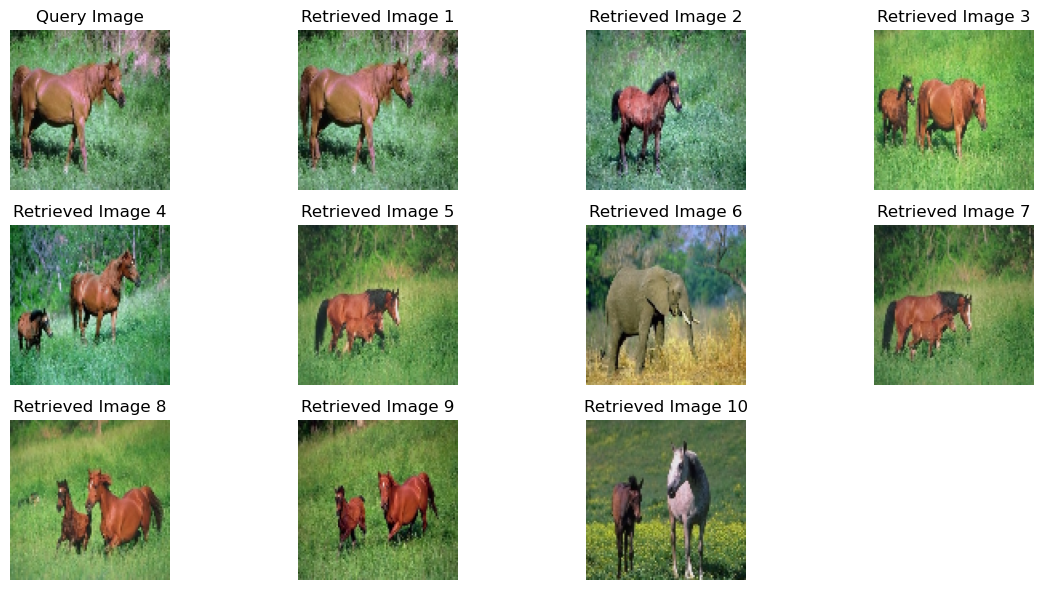

In [32]:
# Display the retrieved images
plt.figure(figsize=(12, 6))
plt.subplot(3, 4, 1)
plt.imshow(query_image_resized, cmap='gray')
plt.title('Query Image')
plt.axis('off')

for i, (image_path, index) in enumerate(zip(nearest_images_paths, range(2, 12)), start=1):
    image = read_and_resize_image(image_path)
    plt.subplot(3, 4, index)
    plt.imshow(image)
    plt.title(f'Retrieved Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()